In [197]:
import selenium
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd

In [199]:
# Initialize the webdriver
driver = webdriver.Chrome()

# Open the target webpage
driver.get("https://www.moneycontrol.com/markets/indian-indices/")

In [201]:
# Find the table headers
th_elements = driver.find_elements(By.TAG_NAME, "th")
headers = [th.text.strip() for th in th_elements if th.text.strip()]

# Print the headers
print("Headers:", headers)

Headers: ['Name', 'LTP', '%Chg', 'Chg', 'Volume', 'Buy Price', 'Sell Price', 'Buy Qty', 'Sell Qty', 'Analysis', 'Technical Rating']


In [203]:
# Find the table data
rows = driver.find_elements(By.XPATH, "//table//tr")

In [205]:
# Initialize an empty list to store row data
table_data = []

# Loop through each row
for row in rows:
    # Extract cell data for each row
    cells = row.find_elements(By.TAG_NAME, "td")
    cell_data = [cell.text.strip() for cell in cells]
    
    # Ensure that rows with missing columns are not added
    if len(cell_data) == len(headers):  # Only add rows with matching columns
        table_data.append(cell_data)

# Create a DataFrame using pandas
df = pd.DataFrame(table_data, columns=headers)

# Print the first few rows to check the data
print(df.head())  # Display the first 5 rows to ensure proper alignment

              Name       LTP   %Chg     Chg      Volume Buy Price Sell Price  \
0  Adani Enterpris  2,388.15   0.32    7.60   1,421,437      0.00   2,388.15   
1      Adani Ports  1,128.90   1.06   11.80   3,135,942      0.00   1,128.90   
2  Apollo Hospital  6,691.85  -0.22  -15.00     547,360  6,691.85       0.00   
3     Asian Paints  2,229.70  -0.46  -10.25   1,308,999  2,229.70       0.00   
4        Axis Bank  1,026.80  -2.36  -24.85  11,418,721      0.00   1,026.80   

  Buy Qty Sell Qty  Analysis Technical Rating  
0       0      875  Analysis                   
1       0      570  Analysis                   
2      67        0  Analysis                   
3     173        0  Analysis                   
4       0    2,184  Analysis                   


In [171]:
# Save the DataFrame as a CSV file
df.to_csv("11_indian_indices.csv", index=False)

# Close the browser
driver.quit()

# Confirm the saved CSV data
print("Data saved to 'updated_indian_indices.csv'")

Data saved to 'updated_indian_indices.csv'


In [207]:
df = df.iloc[:, :-2]

In [213]:
# Strip spaces from all object columns
df['Name'] = df['Name'].str.strip()

# Function to clean columns with commas and convert to appropriate data type
def clean_column(column):
    if column.dtype == 'object':
        column = column.replace({',': ''}, regex=True)
        return column
    return column

# Apply cleaning to all columns
df = df.apply(clean_column)

# Convert columns to appropriate data types
df['Volume'] = df['Volume'].astype(int)  # Volume -> int
df['LTP'] = df['LTP'].astype(float)  # LTP -> float
df['Buy Price'] = df['Buy Price'].astype(float)  # Buy Price -> float
df['Sell Price'] = df['Sell Price'].astype(float)  # Sell Price -> float
df['%Chg'] = df['%Chg'].astype(float)  # %Chg -> float
df['Chg'] = df['Chg'].astype(float)  # Chg -> float
df['Buy Qty'] = df['Buy Qty'].astype(int)  # Buy Qty -> int
df['Sell Qty'] = df['Sell Qty'].astype(int)  # Sell Qty -> int

# Verify the data types
print(df.dtypes)

Name           object
LTP           float64
%Chg          float64
Chg           float64
Volume          int32
Buy Price     float64
Sell Price    float64
Buy Qty         int32
Sell Qty        int32
dtype: object


In [215]:
df.head()

,Name,LTP,%Chg,Chg,Volume,Buy Price,Sell Price,Buy Qty,Sell Qty
0,Adani Enterpris,2388.15,0.32,7.60,1421437,0.00,2388.15,0,875
1,Adani Ports,1128.90,1.06,11.80,3135942,0.00,1128.90,0,570
2,Apollo Hospital,6691.85,-0.22,-15.00,547360,6691.85,0.00,67,0
3,Asian Paints,2229.70,-0.46,-10.25,1308999,2229.70,0.00,173,0
4,Axis Bank,1026.80,-2.36,-24.85,11418721,0.00,1026.80,0,2184


In [217]:
df

,Name,LTP,%Chg,Chg,Volume,Buy Price,Sell Price,Buy Qty,Sell Qty
0,Adani Enterpris,2388.15,0.32,7.60,1421437,0.00,2388.15,0,875
1,Adani Ports,1128.90,1.06,11.80,3135942,0.00,1128.90,0,570
2,Apollo Hospital,6691.85,-0.22,-15.00,547360,6691.85,0.00,67,0
3,Asian Paints,2229.70,-0.46,-10.25,1308999,2229.70,0.00,173,0
4,Axis Bank,1026.80,-2.36,-24.85,11418721,0.00,1026.80,0,2184
5,Bajaj Auto,8578.00,-0.39,-33.20,347402,0.00,8578.00,0,8885
6,Bajaj Finance,7177.40,-2.15,-157.60,681750,0.00,7177.40,0,1045
7,Bajaj Finserv,1671.65,-2.44,-41.85,2098490,1671.65,0.00,989,0
8,Bharat Elec,267.85,-0.76,-2.05,11376064,267.85,0.00,1642,0
9,BPCL,267.00,-1.18,-3.20,13448052,267.00,0.00,2218,0


In [219]:
# Top 10 stocks by volume
top_volume = df.nlargest(10, 'Volume')
print(top_volume[['Name', 'Volume']])

               Name    Volume
33             NTPC  21894626
44       Tata Steel  18773125
9              BPCL  13448052
35  Power Grid Corp  12198882
4         Axis Bank  11418721
8       Bharat Elec  11376064
13       Coal India  11117714
43      Tata Motors  10500910
26              ITC   9786805
36         Reliance   9578856


In [221]:
# Top 10 stocks by percentage change
top_pct_chg = df.nlargest(10, '%Chg')
print(top_pct_chg[['Name', '%Chg']])

               Name  %Chg
47            Trent  3.72
33             NTPC  3.53
35  Power Grid Corp  2.89
28   Kotak Mahindra  2.23
31    Maruti Suzuki  1.76
45    Tech Mahindra  1.73
13       Coal India  1.45
29           Larsen  1.12
36         Reliance  1.09
1       Adani Ports  1.06


In [223]:
# Top 10 stocks by absolute change
top_chg = df.nlargest(10, 'Chg')
print(top_chg[['Name', 'Chg']])

               Name     Chg
47            Trent  229.10
31    Maruti Suzuki  206.25
15    Eicher Motors   52.35
28   Kotak Mahindra   39.00
29           Larsen   38.80
48  UltraTechCement   37.90
45    Tech Mahindra   28.45
41              TCS   16.55
11        Britannia   14.60
36         Reliance   13.45


In [225]:
# Stock with the highest volume
highest_volume = df.loc[df['Volume'].idxmax()]
print(f"Stock with highest volume: {highest_volume['Name']} with volume {highest_volume['Volume']}")

Stock with highest volume: NTPC with volume 21894626


In [259]:
# Top 10 stocks by volume
top_volume = df.nlargest(10, 'Volume')

# Print the top 10 stocks by volume
print(top_volume[['Name', 'Volume']])

               Name    Volume
33             NTPC  21894626
44       Tata Steel  18773125
9              BPCL  13448052
35  Power Grid Corp  12198882
4         Axis Bank  11418721
8       Bharat Elec  11376064
13       Coal India  11117714
43      Tata Motors  10500910
26              ITC   9786805
36         Reliance   9578856


C:\Users\Yoges\AppData\Local\Temp\ipykernel_11064\3312981848.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Volume', y='Name', data=top_volume, palette='viridis')


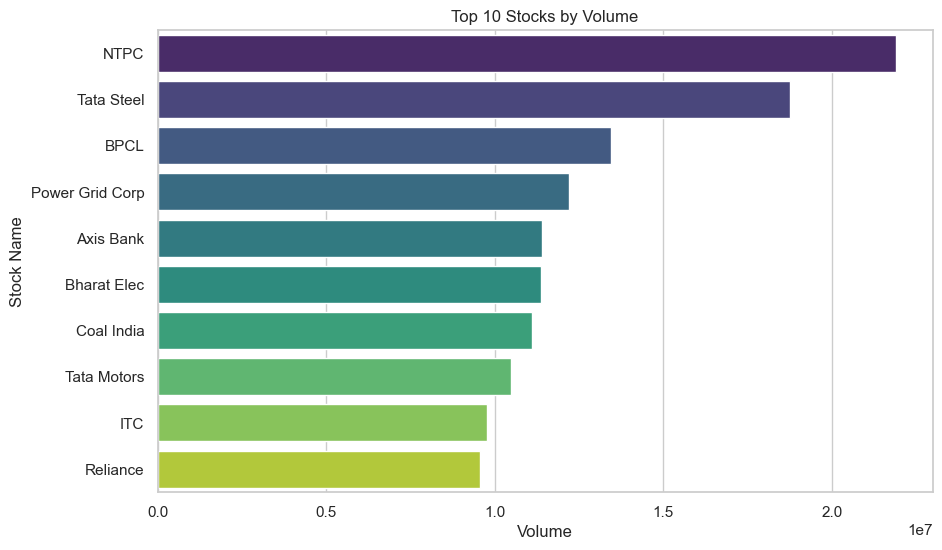

In [257]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Volume', y='Name', data=top_volume, palette='viridis')
plt.title('Top 10 Stocks by Volume')
plt.xlabel('Volume')
plt.ylabel('Stock Name')
plt.show()

C:\Users\Yoges\AppData\Local\Temp\ipykernel_11064\365561558.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Price Spread', y='Name', data=top_spread, palette='coolwarm')


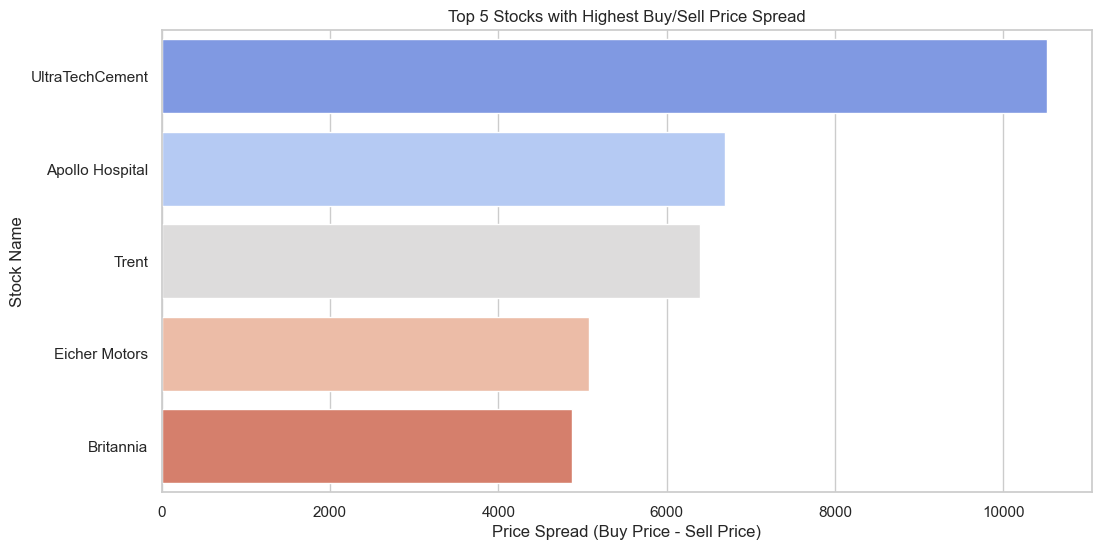

In [233]:
df['Price Spread'] = df['Buy Price'] - df['Sell Price']
top_spread = df.nlargest(5, 'Price Spread')

plt.figure(figsize=(12, 6))
sns.barplot(x='Price Spread', y='Name', data=top_spread, palette='coolwarm')
plt.title('Top 5 Stocks with Highest Buy/Sell Price Spread')
plt.xlabel('Price Spread (Buy Price - Sell Price)')
plt.ylabel('Stock Name')
plt.show()

C:\Users\Yoges\AppData\Local\Temp\ipykernel_11064\2485505675.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Name', y='Chg', data=top_price_change, palette='coolwarm')


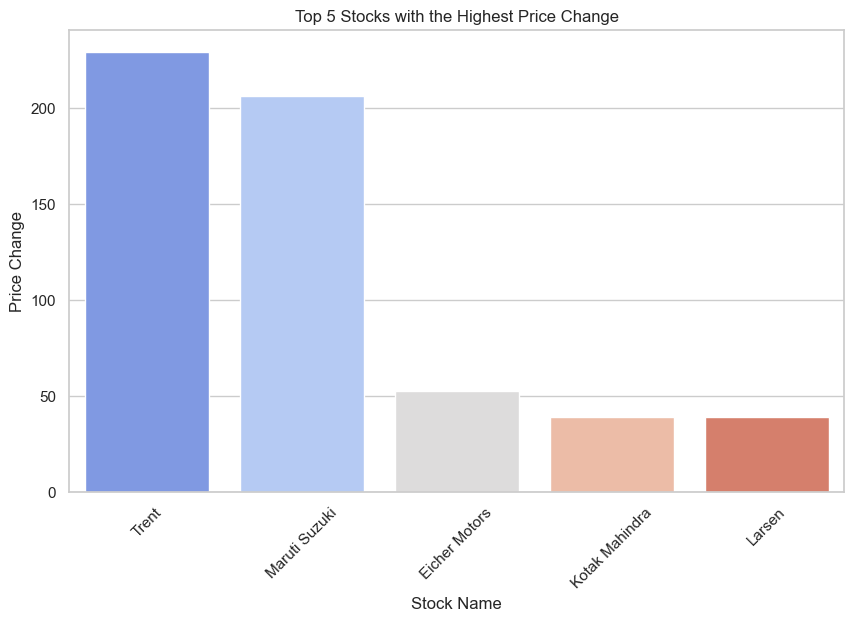

In [235]:
# Top 5 stocks with the highest price change
top_price_change = df.nlargest(5, 'Chg')

plt.figure(figsize=(10, 6))
sns.barplot(x='Name', y='Chg', data=top_price_change, palette='coolwarm')
plt.title('Top 5 Stocks with the Highest Price Change')
plt.xlabel('Stock Name')
plt.ylabel('Price Change')
plt.xticks(rotation=45)
plt.show()

C:\Users\Yoges\AppData\Local\Temp\ipykernel_11064\3711517808.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Name', y='Volume', data=top_volume, palette='Blues')


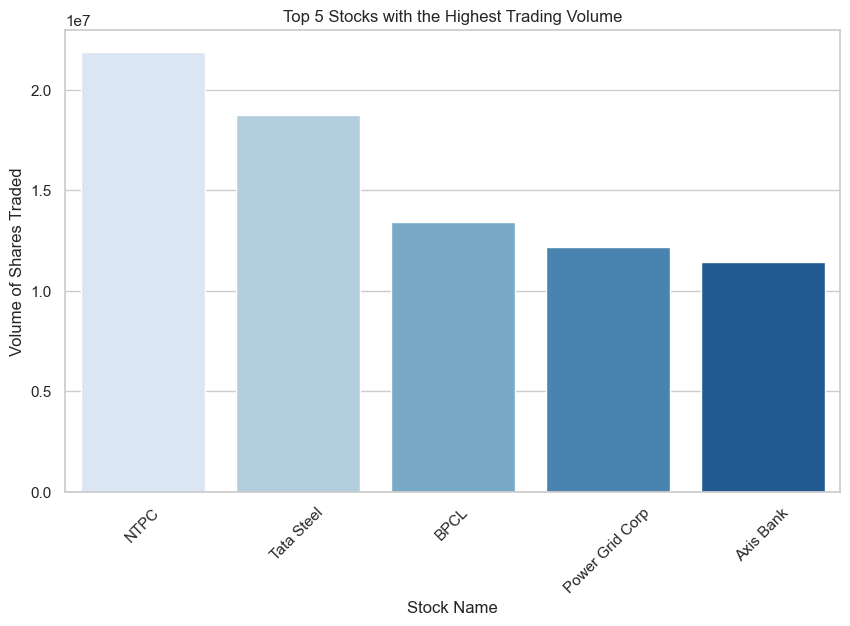

In [237]:
# Bar chart to show volume of stocks traded
top_volume = df.nlargest(5, 'Volume')

plt.figure(figsize=(10, 6))
sns.barplot(x='Name', y='Volume', data=top_volume, palette='Blues')
plt.title('Top 5 Stocks with the Highest Trading Volume')
plt.xlabel('Stock Name')
plt.ylabel('Volume of Shares Traded')
plt.xticks(rotation=45)
plt.show()

C:\Users\Yoges\AppData\Local\Temp\ipykernel_11064\2016886394.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Price Trend', data=df, palette='Set2')


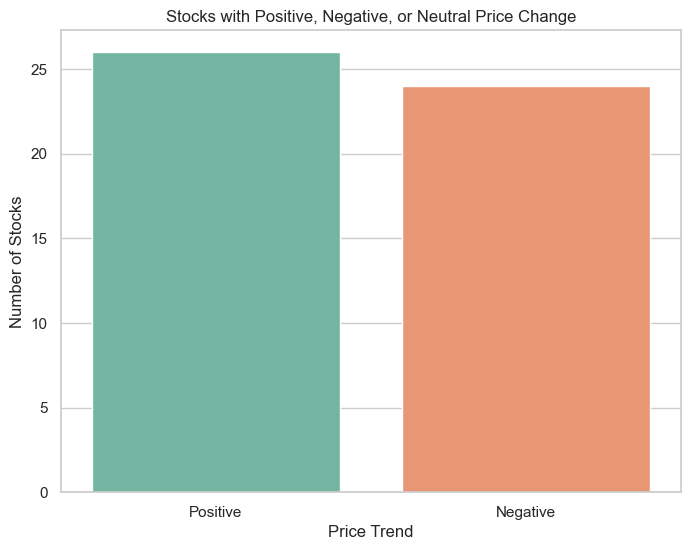

In [241]:
# Categorize stocks based on price change (Positive, Negative, Neutral)
df['Price Trend'] = df['Chg'].apply(lambda x: 'Positive' if x > 0 else 'Negative' if x < 0 else 'Neutral')

plt.figure(figsize=(8, 6))
sns.countplot(x='Price Trend', data=df, palette='Set2')
plt.title('Stocks with Positive, Negative, or Neutral Price Change')
plt.xlabel('Price Trend')
plt.ylabel('Number of Stocks')
plt.show()

C:\Users\Yoges\AppData\Local\Temp\ipykernel_11064\3993635068.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Name', y='Chg', data=top_gainers, palette='Greens')


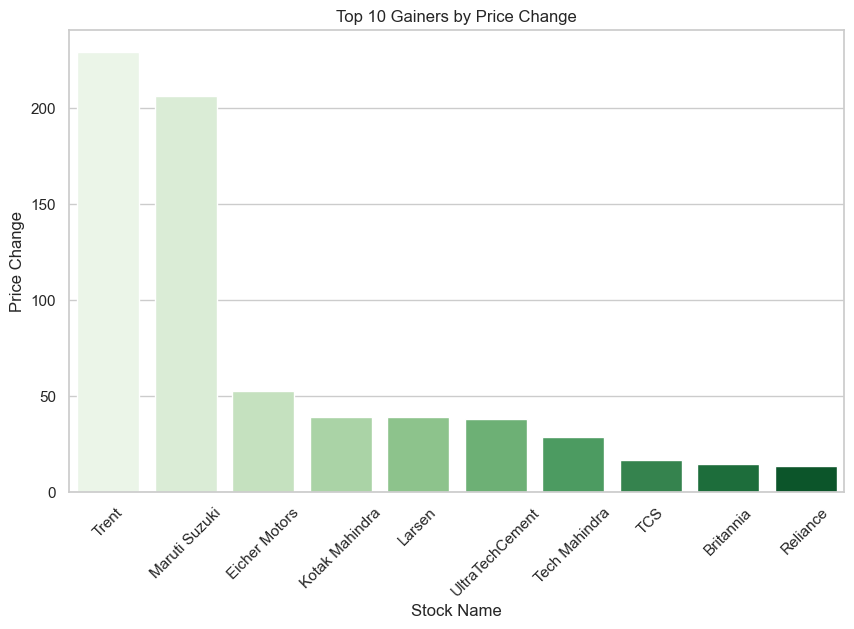

In [243]:
# Top 10 gainers by price change
top_gainers = df[df['Chg'] > 0].nlargest(10, 'Chg')

plt.figure(figsize=(10, 6))
sns.barplot(x='Name', y='Chg', data=top_gainers, palette='Greens')
plt.title('Top 10 Gainers by Price Change')
plt.xlabel('Stock Name')
plt.ylabel('Price Change')
plt.xticks(rotation=45)
plt.show()

C:\Users\Yoges\AppData\Local\Temp\ipykernel_11064\3361392260.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Name', y='Chg', data=top_losers, palette='Reds')


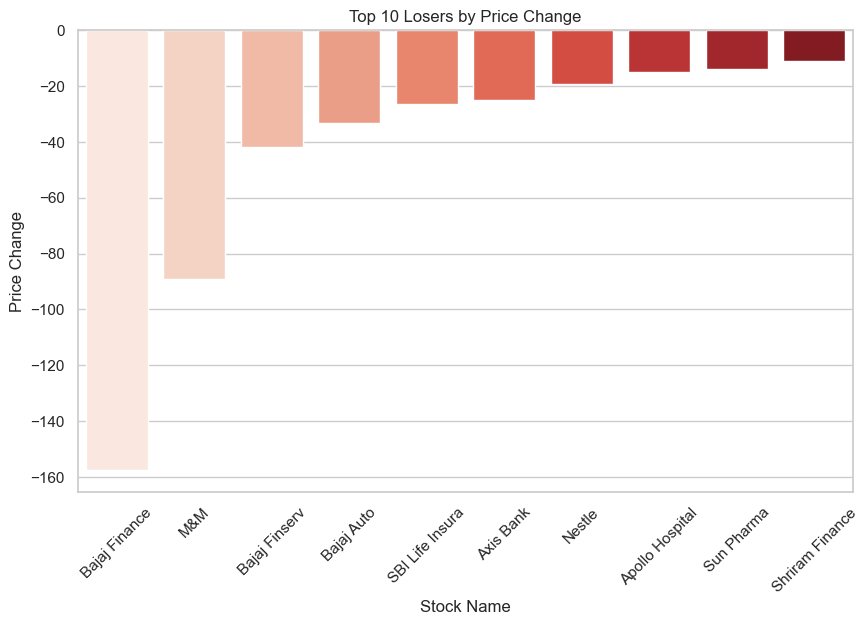

In [245]:
# Top 10 losers by price change
top_losers = df[df['Chg'] < 0].nsmallest(10, 'Chg')

plt.figure(figsize=(10, 6))
sns.barplot(x='Name', y='Chg', data=top_losers, palette='Reds')
plt.title('Top 10 Losers by Price Change')
plt.xlabel('Stock Name')
plt.ylabel('Price Change')
plt.xticks(rotation=45)
plt.show()

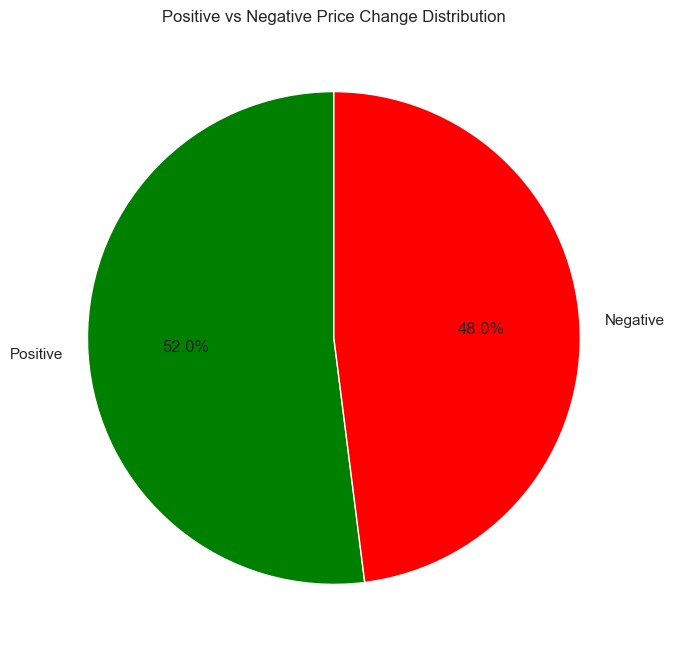

In [247]:
# Pie chart for positive vs negative price change
price_trend_counts = df['Price Trend'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(price_trend_counts, labels=price_trend_counts.index, autopct='%1.1f%%', startangle=90, colors=['green', 'red', 'grey'])
plt.title('Positive vs Negative Price Change Distribution')
plt.show()

C:\Users\Yoges\AppData\Local\Temp\ipykernel_11064\1216080791.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Name', y='Buy vs Sell', data=top_buy_sell, palette='coolwarm')


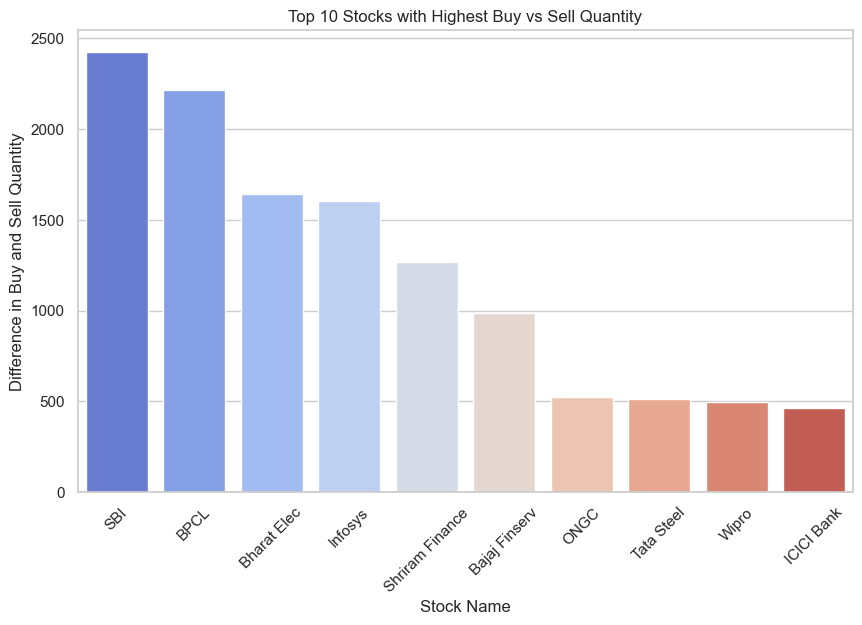

In [249]:
# Stocks with highest buy quantity vs sell quantity
df['Buy vs Sell'] = df['Buy Qty'] - df['Sell Qty']
top_buy_sell = df.nlargest(10, 'Buy vs Sell')

plt.figure(figsize=(10, 6))
sns.barplot(x='Name', y='Buy vs Sell', data=top_buy_sell, palette='coolwarm')
plt.title('Top 10 Stocks with Highest Buy vs Sell Quantity')
plt.xlabel('Stock Name')
plt.ylabel('Difference in Buy and Sell Quantity')
plt.xticks(rotation=45)
plt.show()

C:\Users\Yoges\AppData\Local\Temp\ipykernel_11064\2632890346.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Name', y='Price Difference', data=top_diff, palette='magma')


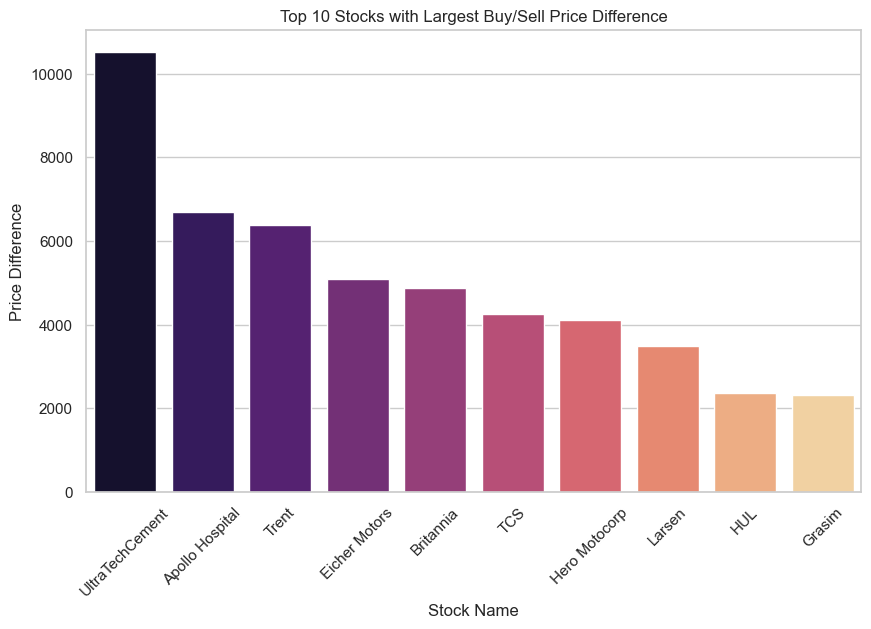

In [253]:
# Calculate the difference between Buy Price and Sell Price
df['Price Difference'] = df['Buy Price'] - df['Sell Price']

# Bar chart showing stocks with larger price differences
top_diff = df.nlargest(10, 'Price Difference')

plt.figure(figsize=(10, 6))
sns.barplot(x='Name', y='Price Difference', data=top_diff, palette='magma')
plt.title('Top 10 Stocks with Largest Buy/Sell Price Difference')
plt.xlabel('Stock Name')
plt.ylabel('Price Difference')
plt.xticks(rotation=45)
plt.show()